# Data Visualization: criando gráficos com Python

## 01. Conhecendo a biblioteca Matplotlib

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/imigrantes_canada.csv')
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [5]:
df.set_index('País', inplace=True)

In [7]:
anos = list(map(str, range(1980, 2014)))

In [9]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [10]:
brasil = df.loc['Brasil', anos]
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brasil, dtype: object

In [12]:
brasil_dict = dict(ano=brasil.index.tolist(),
                   imigrantes=brasil.values.tolist())
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


#### Para saber mais: o que o plano cartesiano tem a ver com visualização de dados

Mayza é uma estudante de Data Science em busca de novos conhecimentos e experiências. Em seu projeto mais recente, ela se deparou com um desafio: como criar gráficos em Python que realmente transmitam as informações necessárias? Com a mente inquieta e sedenta por respostas, ela está trabalhando em um projeto que requer a visualização de dados, porém não tem ideia de como pode começar. Ao mergulhar nos seus estudos, Mayza se deparou frequentemente com o termo **plano cartesiano**.

Você certamente já ouviu falar sobre esse termo. Pode ser que tenha sido em alguma aula de geografia, por exemplo. Mas afinal, o que isso tem a ver com a visualização de dados?

Imagine um mapa comum, daqueles que mostram ruas, pontos turísticos e outras informações úteis para quem está viajando. Seu objetivo principal é fornecer orientações e referências de forma clara e fácil de entender, a ponto de auxiliar o viajante a encontrar o caminho certo e tomar as melhores decisões durante sua jornada. O plano cartesiano segue a mesma ideia, porém ao invés de ruas e prédios, ele mostra informações em forma de gráficos. Com ele, podemos visualizar informações complexas de maneira intuitiva e eficiente, facilitando a tomada de decisões e a resolução de problemas por conta dos eixos que se cruzam em um ponto central.

Com o uso do plano cartesiano, constituído pelos **eixo X** e o **eixo Y**, é possível criar um sistema de coordenadas bidimensional que facilita a localização e análise de dados. Esses eixos também são conhecidos pelos seguintes nomes:

    - eixo x: eixo das abscissas.
    - eixo y: eixo das ordenadas.

Os eixos são componentes essenciais devido às suas combinações, que possibilitam uma maior precisão na identificação de pontos em um espaço bidimensional. Na figura abaixo, temos a representação de um plano cartesiano contendo os eixos X e Y para exemplificar. Com ele podemos notar algumas características importantes:

    - O eixo X é horizontal.
    - O eixo Y é vertical.
    - No centro temos a origem, o valor 0 (zero).
    - Para a direita e para cima temos valores positivos.
    - Para a esquerda e para baixo temos valores negativos.

![plano_cartesiano_1](https://cdn1.gnarususercontent.com.br/1/815643/8e496356-0299-4d9e-97cf-a41c8d526c50.png)

Como é possível constatar através dessas representações, os eixos nos permitem especificar a localização exata de um ponto em um espaço bidimensional, de modo que os valores de X e Y são chamados de **coordenadas** por descreverem a localização do ponto em relação à origem. Na figura abaixo, temos um plano cartesiano contendo pontos de algumas coordenadas: (2,5), (1,2), (0,1), (-1,-4) e (-2,-7). Considere a representação e observe os pontos disponibilizados. Assim você pode visualizar melhor a relação entre eles e entender padrões e tendências nos dados.

![plano_cartesiano_2](https://cdn1.gnarususercontent.com.br/1/815643/100a8a20-894b-4da2-aef8-8bdfb1f74452.png)

Quando nós criamos um gráfico, as coordenadas dos pontos são utilizadas para definir a posição de cada ponto no gráfico. E uma curiosidade interessante: o plano cartesiano e o eixo de coordenadas são amplamente usados em vários campos, incluindo Matemática, Física, Engenharia, Ciência de Dados e muitos outros, sendo uma ferramenta fundamental para a representação de dados e para a visualização de resultados em diversos contextos.

Você lembra da saga da Mayza? Depois de explorar as possibilidades em seus estudos, Mayza compreendeu o conceito de plano cartesiano e como isso pode ser útil no projeto de visualização de dados dela. Agora ela precisa de alguns insights para criar um gráfico e soube que você pode ajudá-la nisso.

E aí, vamos criar nosso primeiro gráfico agora?!

In [13]:
import matplotlib.pyplot as plt

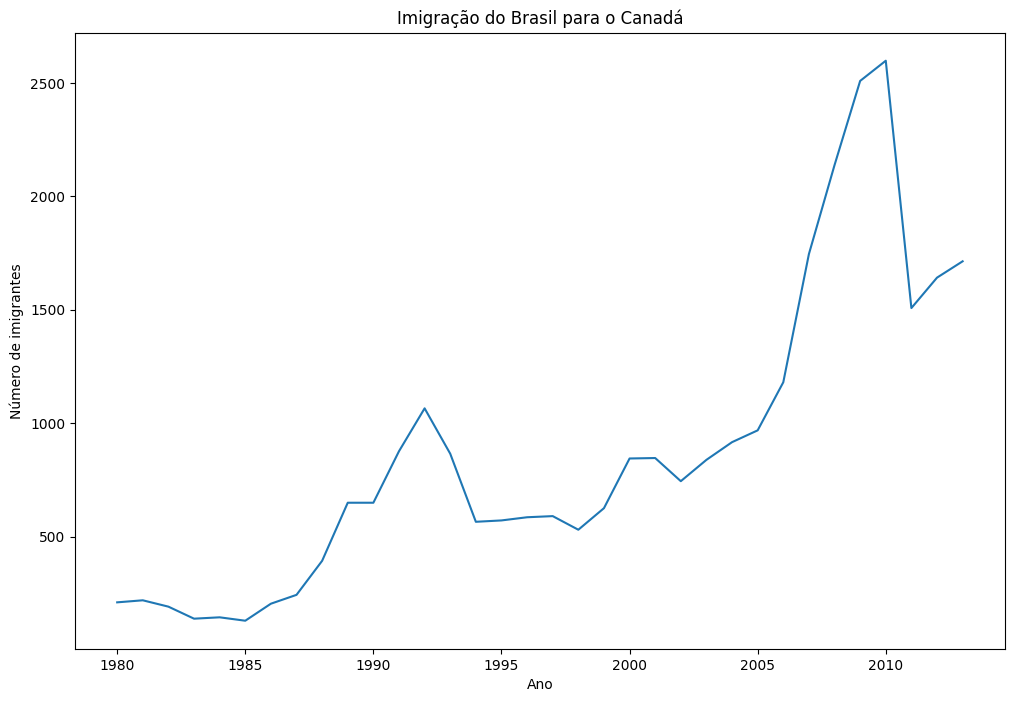

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(ticks=['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
# plt.yticks(ticks=[500, 1000, 1500, 2000, 2500, 3000])
plt.title(label='Imigração do Brasil para o Canadá')
plt.xlabel(xlabel='Ano')
plt.ylabel(ylabel='Número de imigrantes')
plt.show()

#### Desafio: comparando tendências de imigração 

In [27]:
df_comparacao = df.loc[['Brasil', 'Argentina'], anos]
df_comparacao = df_comparacao.T
df_comparacao.head()

País,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


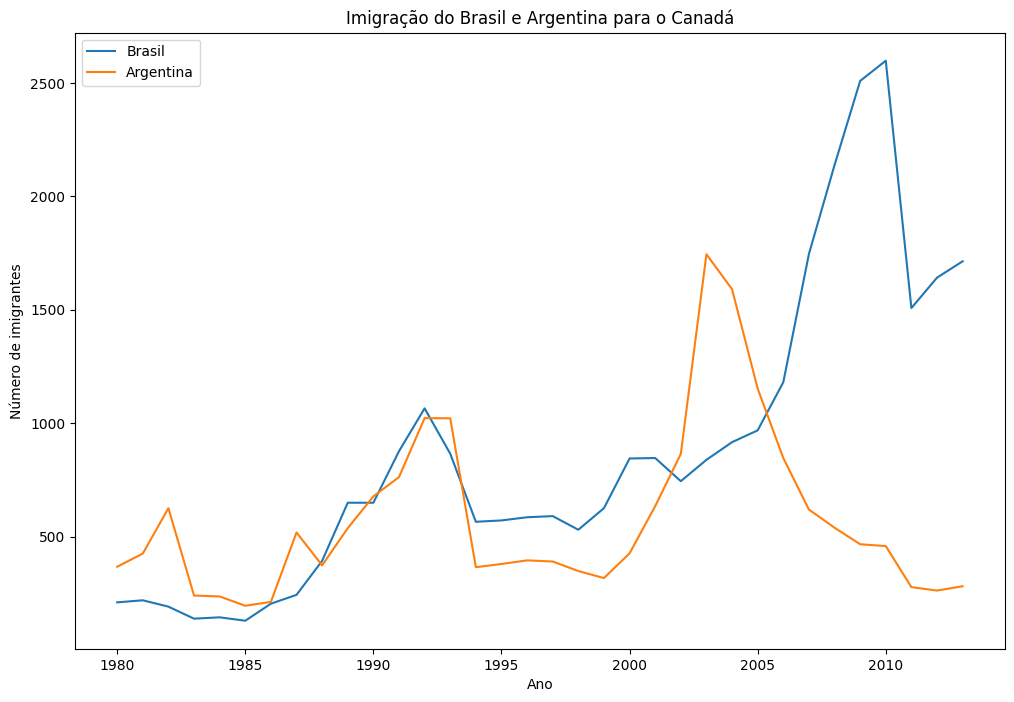

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(df_comparacao['Brasil'], label='Brasil')
plt.plot(df_comparacao['Argentina'], label='Argentina')
plt.title('Imigração do Brasil e Argentina para o Canadá')
plt.xlabel(xlabel='Ano')
plt.ylabel(ylabel='Número de imigrantes')
plt.xticks(ticks=list(map(str, range(1980, 2013, 5))))
plt.legend()
plt.show()

## 02. Criando figuras com Matplotlib

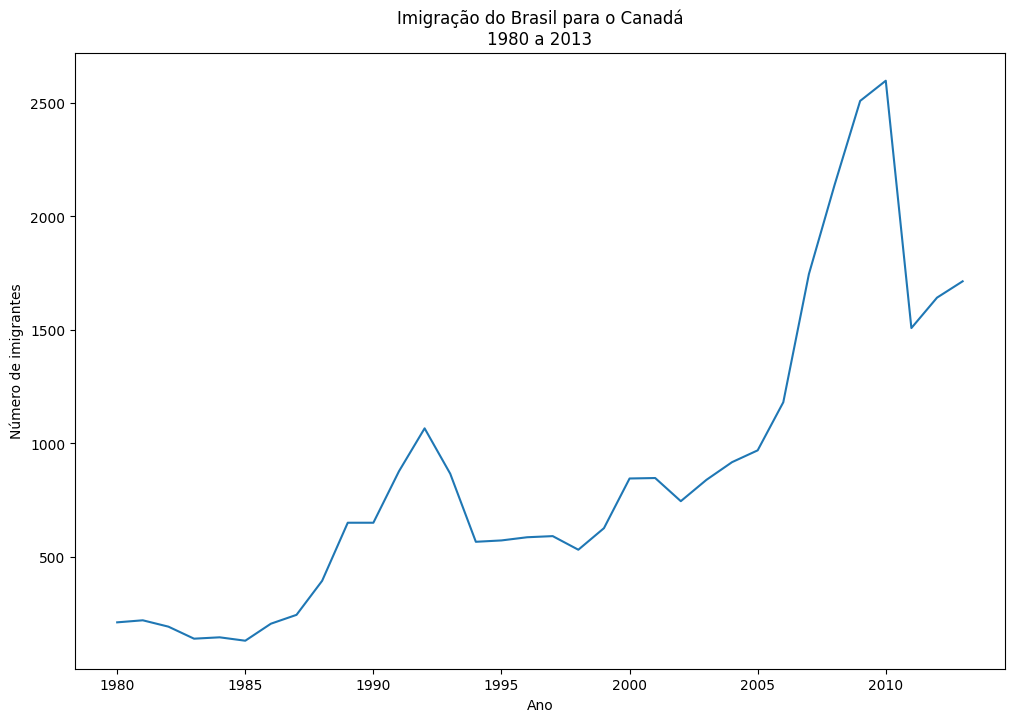

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(base=5))

plt.show()

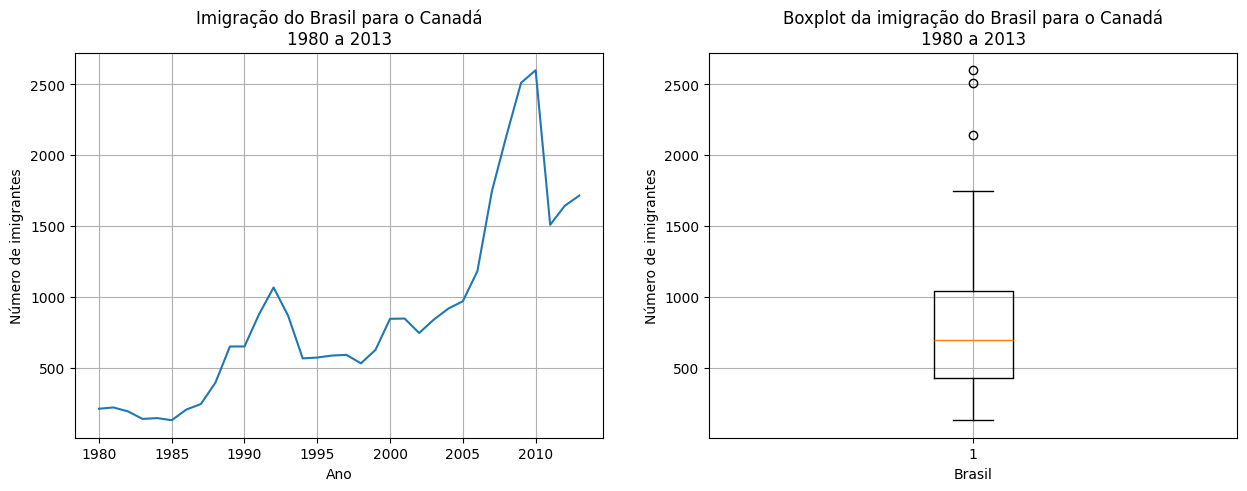

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(base=5))
axs[0].grid()

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()

plt.show()

In [39]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


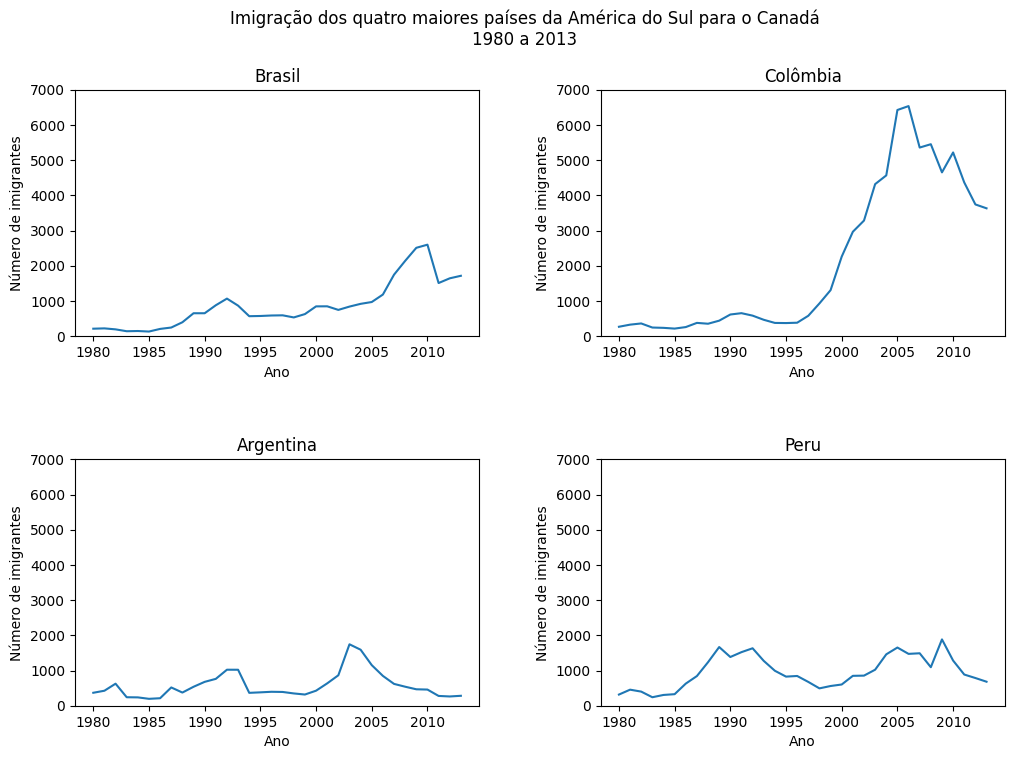

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá\n1980 a 2013')

axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

[ax.xaxis.set_major_locator(plt.MultipleLocator(base=5)) for ax in axs.flat]
[(ax.set_xlabel('Ano'), ax.set_ylabel('Número de imigrantes')) for ax in axs.flat]
[ax.set_ylim(0, 7000) for ax in axs.ravel()]

plt.show()

#### Para saber mais: boas práticas de visualização de dados para subplots

Juliana, uma talentosa cientista de dados, decidiu mergulhar em um intrigante projeto no universo do varejo. Com seu conhecimento, e através de sua análise de dados, ela tem investigado as vendas mensais de diferentes produtos em várias lojas da empresa. Com o objetivo de entender melhor esses dados, ela decidiu criar um conjunto de subplots para comparar as vendas de diferentes produtos em cada loja.

Porém, no decorrer da criação desses subplots, Juliana pode notar a importância de seguir algumas boas práticas de visualização de dados para criar subplots eficazes e assim garantir que a figura resultante fosse clara e fácil de entender. Aqui estão alguma dicas que ajudaram Juliana a tornar sua figura mais detalhada e informativa:

    - Usar títulos claros e concisos: o título de cada subplot deve ser curto e descritivo para que o(a) leitor(a) possa rapidamente entender o que está sendo mostrado em cada um elemento. Além disso, se você estiver comparando diferentes conjuntos de dados, pode ser útil adicionar um subtítulo explicando o que está sendo comparado.
    - Manter a mesma escala nos eixos: para evitar distorções na comparação entre os subplots, é importante manter a mesma escala nos eixos X e Y em todos eles. Isso pode ser feito utilizando as funções `set_xlim()` e `set_ylim()`.
    - Evitar sobrepor gráficos: é importante garantir que cada subplot seja claramente separado dos outros, sem sobreposição. Se houver uma sobreposição, a figura pode se tornar confusa e difícil de entender. Uma maneira de evitar sobreposiçõies é ajustar o tamanho dos subplots para que haja espaço suficiente entre eles. Além disso, podemos adicionar a função `fig.subplots_adjust()` que recebe o parâmetro `hspace`. Ela controla o espaçamento vertical entre os subplots e o parâmetro `wspace`, que controla o espaçamento horizontal. O valor padrão desses parâmetros é 0.2, mas vpcê pode ajustá-los de acordo com as suas necessidades.

> **Lembre-se que o valor passado para esses parâmetros é um número decimal que representa a fração do tamanho da figura, por exemplo, 0.5 significa que o espaçamento será de 50% da altura/largura da figura.

Com essas boas práticas em mente, Juliana criou seus subplots e conseguiu visualizar as vendas diárias de diferentes produtos de forma clara e eficaz em várias lojas da empresa. Ela foi capaz de identificar padrões interessantes nos dados e usou essas informações para fazer recomendações úteis para a empresa, nos deixando insights valiosos sobre boas práticas de visualização de dados para subplots.

Que tal impulsionar a qualidade e o impacto das suas visualizações colocando em prática essas valiosas dicas?! Explore e experimente todas essas possibilidades. Essa iniciativa, sem dúvida alguma, fará toda a diferença no seu desenvolvimento.

#### Desafio: visualizando dados de vendas de diferentes lojas

In [47]:
lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}

In [56]:
df_desafio = pd.DataFrame(vendas_2022, index=lojas)
df_desafio.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


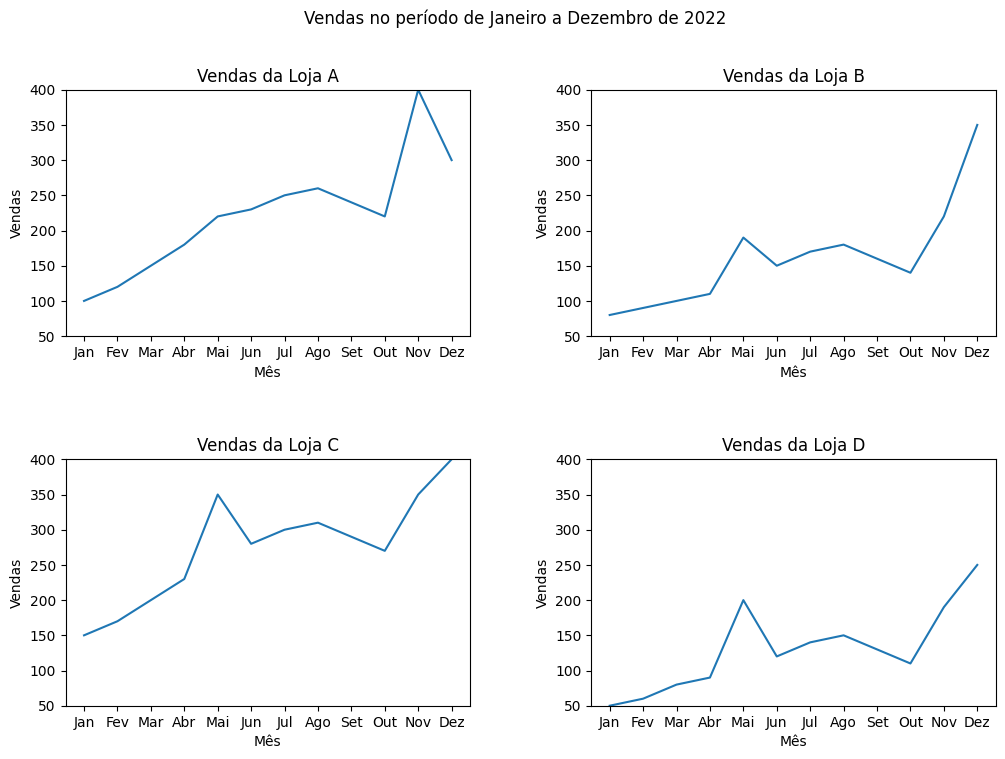

In [70]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Vendas no período de Janeiro a Dezembro de 2022')

axs[0, 0].plot(df_desafio.loc['A'])
axs[0, 0].set_title('Vendas da Loja A')

axs[0, 1].plot(df_desafio.loc['B'])
axs[0, 1].set_title('Vendas da Loja B')

axs[1, 0].plot(df_desafio.loc['C'])
axs[1, 0].set_title('Vendas da Loja C')

axs[1, 1].plot(df_desafio.loc['D'])
axs[1, 1].set_title('Vendas da Loja D')


[ax.set_ylim(50, 400) for ax in axs.ravel()]
[(ax.set_xlabel('Mês'), ax.set_ylabel('Vendas')) for ax in axs.flat]

plt.show()

## 03. Customizando com o Matplotlib

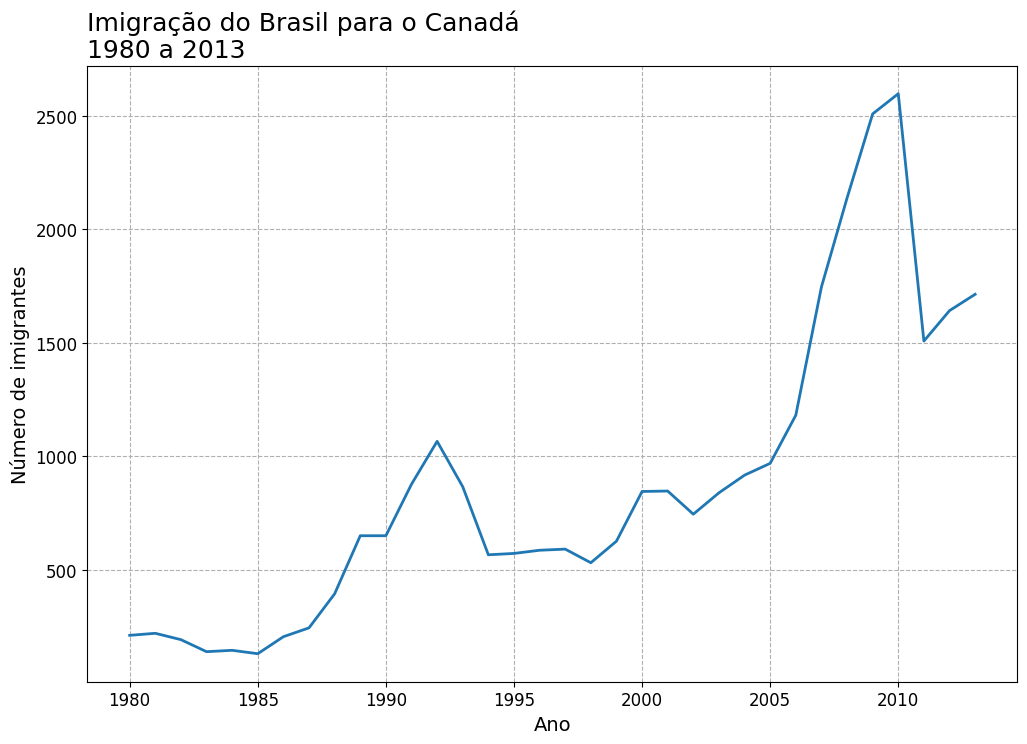

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=2)
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(base=5))

plt.grid(linestyle='--')
plt.show()

#### Para saber mais: alterando estilos

Nós personalizamos as visualizações no vídeo anterior, alterando o tamanho das fontes, mudando a posição do título e também adicionando elementos como marcadores e grades às figuras. Mas além disso, segundo a [documentação](https://matplotlib.org/stable/gallery/style_sheets/index.html) da biblioteca Matplotlib podemos aplicar diferentes estilos para permitir que nós adaptemos as visualizações de acordo com as nossas necessidades. Para saber quais estilos estão disponíveis, podemos imprimir `style.available`, onde `style` é um submódulo da biblioteca Matplotlib utilizado para definir estilos de visualização:

```python
print(plt.style.available)
```

O resultado é uma lista contendo todos os estilos disponíveis:

```python
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
```

Podemos explorar um desses estilos para melhorar ainda mais nossas visualizações!

Antes de aplicar um estilo, é importante saber que cada vez que a biblioteca Matplotlib é importada em um notebook, ela define uma configuração de tempo de execução que inclui os estilos padrão para cada elemento de plotagem criado.

Portanto, para evitar que o estilo seja aplicado a todos os gráficos plotados no mesmo notebook, podemos utilizar um código que cria uma cópia das configurações padrão de plotagem da biblioteca Matplotlib e as atribuir à variável `IPython_default`. Isso pode ser útil para armazenar e reutilizar as configurações padrão de plotagem ou para restaurá-la depois de terem sido modificadas:

```python
IPython_default = plt.rcParams.copy()
```

Um dos estilos disponíveis é baseado em um site de notícias e análises de dados chamado [FiveThirtyEight](https://fivethirtyeight.com/), que cobre assuntos como política, economia, cultura, ciência e esportes.

Para utilizar o estilo '**fivethirtyeight**' usamos o código abaixo:

```python
plt.style.use('fivethirtyeight')
```

Em seguida, podemos criar a figura, que terá esse novo estilo incorporado:

```python
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=20, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()
```

O resultado será o gráfico exibido abaixo:

![fivethirtyeight_graph](https://cdn3.gnarususercontent.com.br/3055-data-visualization/Aula+3/estilo.png)

Os gráficos criados com o estilo FiveThirtyEight são lindos e possuem estética limpa e minimalista, com linhas mais grossas e cores vibrantes.

Bom, mas e se a gente quiser plotar gráficos sem esse estilo depois de ter definido ele no notebook? Podemos redefinir os parâmetros utilizando `rcParams.update` e passando a ele a variável `IPython_default` que criamos anteriormente com as configurações padrão:

```python
plt.rcParams.update(IPython_default)
```

Além disso, podemos aplicar um estilo apenas a um bloco de código específico, pois o pacote de estilo fornece um gerenciador de contexto para limitar suas alterações a um escopo específico. Pra isolar suas alterações de estilo, você pode escrever o código dentro de um contexto `with` da seguinte forma:

```python
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
  ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=20, loc='left')
  ax.set_ylabel('Número de imigrantes', fontsize=14)
  ax.set_xlabel('Ano', fontsize=14)
  ax.yaxis.set_tick_params(labelsize=12)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  plt.show()
```

Gostou desse novo estilo? A biblioteca Matplotlib oferece uma variedade de estilos, além do FiveThirtyEight, que podemos testar e aplicar aos nossos dados. Com essas opções, podemos tornar nossas visualizações ainda mais atraentes, melhorando a apresentação das informações que queremos transmitir.